In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from fa2 import ForceAtlas2
import numpy as np

In [2]:
# Create ForceAtlas2 object with desired parameters
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

# Spatialize 2D Grid Graph

Name: 
Type: Graph
Number of nodes: 625
Number of edges: 1200
Average degree:   3.8400


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:26<00:00, 187.91it/s]


BarnesHut Approximation  took  6.50  seconds
Repulsion forces  took  17.99  seconds
Gravitational forces  took  0.26  seconds
Attraction forces  took  0.12  seconds
AdjustSpeedAndApplyForces step  took  0.93  seconds


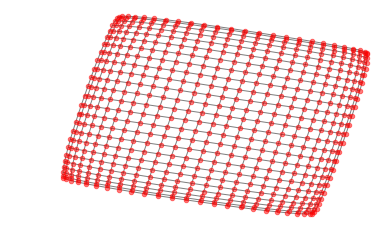

In [27]:
G = nx.grid_2d_graph(25, 25)
print(nx.info(G))
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=5000)
nx.draw_networkx(G, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

# Spatialize Random Geometric Graph

Name: 
Type: Graph
Number of nodes: 400
Number of edges: 8435
Average degree:  42.1750


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:06<00:00, 289.06it/s]


BarnesHut Approximation  took  1.41  seconds
Repulsion forces  took  4.74  seconds
Gravitational forces  took  0.06  seconds
Attraction forces  took  0.28  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


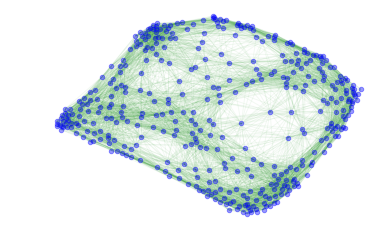

In [26]:
G = nx.random_geometric_graph(400, 0.2)
print(nx.info(G))
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nx.draw_networkx_nodes(G, positions, node_size=20, with_labels=False, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

# Run forceatlas2 on 2D adjacency matrix

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 104548.66it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


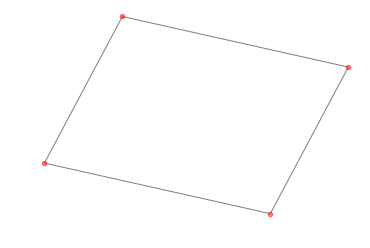

In [12]:
# run forceatlas2
G = np.array([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]) # simple 2x2 grid graph
positions = forceatlas2.forceatlas2(G, pos=None, iterations=10000)

# To plot the graph
networkx_graph = nx.from_numpy_matrix(G)
nx.draw_networkx(networkx_graph, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()

# igraph example

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1940.51it/s]


BarnesHut Approximation  took  0.23  seconds
Repulsion forces  took  0.64  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.08  seconds


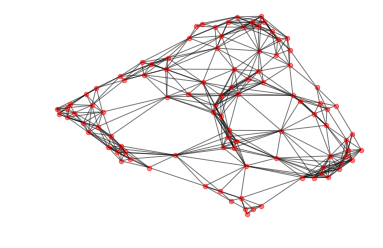

In [15]:
import igraph

# Construct an iGraph
G = nx.random_geometric_graph(100, 0.2)
iG = igraph.Graph.TupleList(G.edges(), directed=False) # converting to iGraph
iG.es['weight'] = np.random.randint(low=1, high=10, size=len(G.edges())) # set random edge weights

# run forceatlas2 on iGraph
layout = forceatlas2.forceatlas2_igraph_layout(iG, pos=None, iterations=2000, weight_attr='weight')

# plot iGraph (using Networkx or you can use iGraph plot func too)
nxG = nx.Graph(iG.get_edgelist())
positions = layout.coords
nx.draw_networkx(nxG, positions, node_size=20, with_labels=False, alpha=0.5)
plt.axis('off')
plt.show()